<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [84]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

%matplotlib inline
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'
df = pd.read_csv(breast_cancer_csv)
from sklearn import datasets
import seaborn as sns
from sklearn.impute import SimpleImputer


In [86]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'
df = pd.read_csv(breast_cancer_csv)

### 2. EDA

Explore dataset. Clean data. Find correlation.

In [3]:
df.head


<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [89]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [91]:
df.tail

<bound method NDFrame.tail of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [15]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [93]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [95]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [97]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [99]:
print(df.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [101]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [103]:
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_s

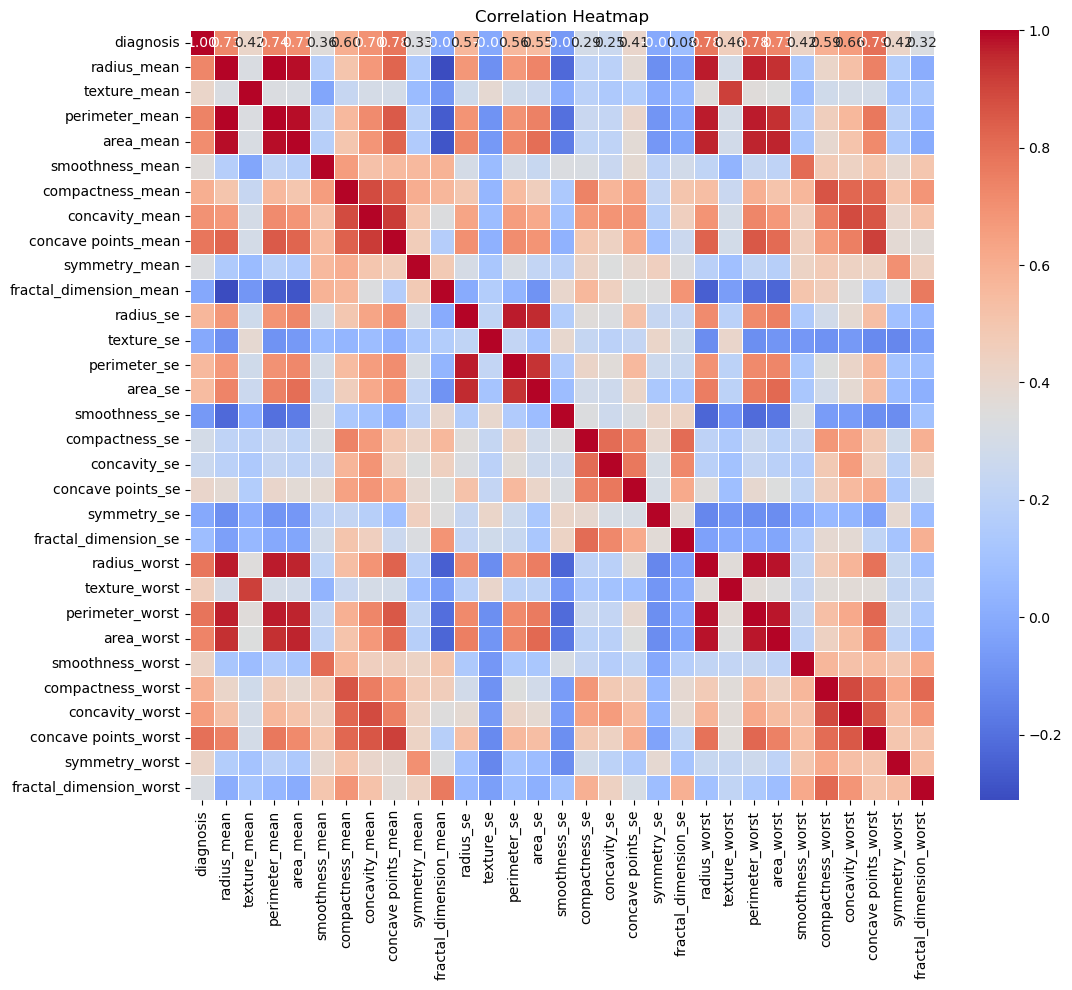

In [21]:
plt.figure(figsize=(12, 10))  # Adjust the size as needed
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [105]:
# ANSWER
classes = df['diagnosis'].unique()
num_classes = len(classes)

print("Unique classes in the 'diagnosis' column:", classes)
print("Number of classes:", num_classes)

Unique classes in the 'diagnosis' column: [1 0]
Number of classes: 2


### 4. What is the baseline accuracy?

In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



In [110]:
class_counts = df['diagnosis'].value_counts()


In [112]:
most_frequent_class_count = class_counts.max()
total_samples = len(df)

In [114]:
baseline_accuracy = most_frequent_class_count / total_samples

print("Class counts:")
print(class_counts)
print("Baseline accuracy:", baseline_accuracy)

Class counts:
diagnosis
0    357
1    212
Name: count, dtype: int64
Baseline accuracy: 0.6274165202108963


### 5. Choose features to be your predictor variables and set up your X.

In [117]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [121]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [126]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)
# fit on the unstandardized data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [128]:
y_train_pred = knn.predict(X)


In [130]:
train_accuracy = accuracy_score(y, y_train_pred)
print("Training accuracy with 1 neighbor:", train_accuracy)

Training accuracy with 1 neighbor: 1.0


### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [133]:
# ANSWER
# predict the response values for the observations in X ("test the model")
y_test_pred = knn.predict(X_test)
# store the predicted response values
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy with 1 neighbor:", test_accuracy)

Test accuracy with 1 neighbor: 1.0


### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [136]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_test_pred = knn.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy with 1 neighbor:", test_accuracy)

Test accuracy with 1 neighbor: 0.9385964912280702


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [139]:
# ANSWER
k = X_train_scaled.shape[0]
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
knn = KNeighborsClassifier(n_neighbors=k)
# Fit Train Data
knn.fit(X_train_scaled, y_train)
y_test_pred = knn.predict(X_test_scaled)
# Print accuracy_score
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test accuracy with K = {k}: {test_accuracy:.4f}")       

Test accuracy with K = 455: 0.6228


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
# Initialize lists for storing results
num_neighbors_list = []
test_accuracies = []

# Loop through different values of K
for k in range(1, len(X_train) + 1):
    try:
        # Create and train the model
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train_scaled, y_train)
        
       # Make predictions and evaluate accuracy
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)

       # Store results
        num_neighbors_list.append(k)
        test_accuracies.append(accuracy)
        
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")

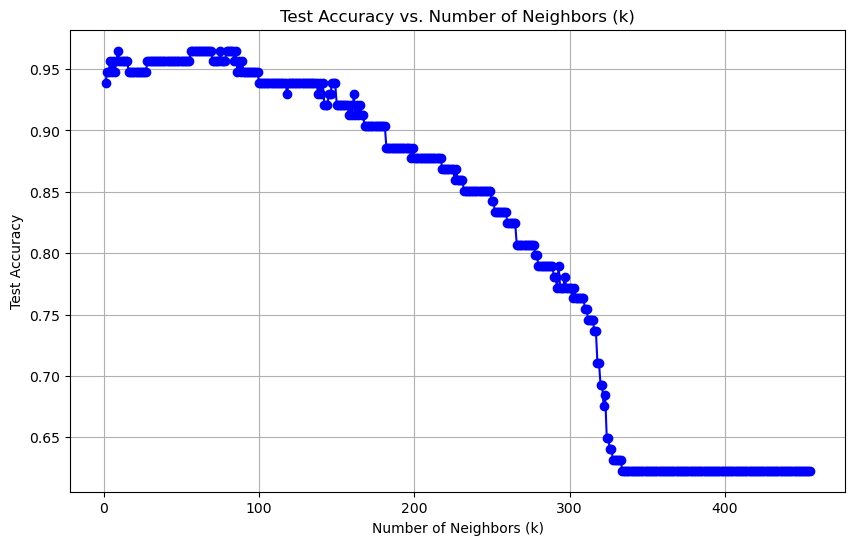

In [145]:
# Plot test accuracy vs. number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(num_neighbors_list, test_accuracies, marker='o', linestyle='-', color='b')
plt.title('Test Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

In [146]:
# ANSWER
# plot test accuracy by number of neighbors:
max_neighbors = 20  # You can adjust this if needed
num_neighbors = np.arange(1, max_neighbors + 1)
test_accuracies = []

In [147]:
for k in num_neighbors:
    print(f"Training with K = {k}")  # Debug: Print current K value
    

Training with K = 1
Training with K = 2
Training with K = 3
Training with K = 4
Training with K = 5
Training with K = 6
Training with K = 7
Training with K = 8
Training with K = 9
Training with K = 10
Training with K = 11
Training with K = 12
Training with K = 13
Training with K = 14
Training with K = 15
Training with K = 16
Training with K = 17
Training with K = 18
Training with K = 19
Training with K = 20


In [148]:
try:
        # Create and fit the KNN model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        
        # Predict and evaluate the model on the test set
        y_test_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_test_pred)
        
        # Append the accuracy to the list
        test_accuracies.append(accuracy)
        
        # Debug: Print accuracy for the current K
        print(f"Accuracy for K = {k}: {accuracy}")

except Exception as e:
         print(f"An error occurred for K = {k}: {e}")
         

Accuracy for K = 20: 0.9473684210526315


In [154]:
# Lists to store values
num_neighbors = []
test_accuracies = []

In [156]:
# Loop through different values of K
for k in range(1, len(X_train) + 1):
    try:
        # Create and train the model
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_test_pred = model.predict(X_test_scaled)
        
        # Compute accuracy
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Append values to lists
        num_neighbors.append(k)
        test_accuracies.append(test_accuracy)
        print(f"K={k}, Accuracy={test_accuracy:.4f}")
    
    except Exception as e:
        print(f"An error occurred with K={k}: {e}")
        # Ensure both lists have a value even if an error occurs
        num_neighbors.append(k)
        test_accuracies.append(None)


K=1, Accuracy=0.9386
K=2, Accuracy=0.9474
K=3, Accuracy=0.9474
K=4, Accuracy=0.9561
K=5, Accuracy=0.9474
K=6, Accuracy=0.9561
K=7, Accuracy=0.9474
K=8, Accuracy=0.9561
K=9, Accuracy=0.9649
K=10, Accuracy=0.9561
K=11, Accuracy=0.9561
K=12, Accuracy=0.9561
K=13, Accuracy=0.9561
K=14, Accuracy=0.9561
K=15, Accuracy=0.9561
K=16, Accuracy=0.9474
K=17, Accuracy=0.9474
K=18, Accuracy=0.9474
K=19, Accuracy=0.9474
K=20, Accuracy=0.9474
K=21, Accuracy=0.9474
K=22, Accuracy=0.9474
K=23, Accuracy=0.9474
K=24, Accuracy=0.9474
K=25, Accuracy=0.9474
K=26, Accuracy=0.9474
K=27, Accuracy=0.9474
K=28, Accuracy=0.9561
K=29, Accuracy=0.9561
K=30, Accuracy=0.9561
K=31, Accuracy=0.9561
K=32, Accuracy=0.9561
K=33, Accuracy=0.9561
K=34, Accuracy=0.9561
K=35, Accuracy=0.9561
K=36, Accuracy=0.9561
K=37, Accuracy=0.9561
K=38, Accuracy=0.9561
K=39, Accuracy=0.9561
K=40, Accuracy=0.9561
K=41, Accuracy=0.9561
K=42, Accuracy=0.9561
K=43, Accuracy=0.9561
K=44, Accuracy=0.9561
K=45, Accuracy=0.9561
K=46, Accuracy=0.95

In [157]:
print(f"Number of neighbors length: {len(num_neighbors)}")
print(f"Test accuracies length: {len(test_accuracies)}")
print(f"Test accuracies (first 10): {test_accuracies[:10]}")

Number of neighbors length: 455
Test accuracies length: 455
Test accuracies (first 10): [0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193]


In [158]:
print(f"Length of num_neighbors before filtering: {len(num_neighbors)}")
print(f"Length of test_accuracies before filtering: {len(test_accuracies)}")
print(f"First 10 values of num_neighbors: {num_neighbors[:10]}")
print(f"First 10 values of test_accuracies: {test_accuracies[:10]}")

Length of num_neighbors before filtering: 455
Length of test_accuracies before filtering: 455
First 10 values of num_neighbors: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
First 10 values of test_accuracies: [0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193]


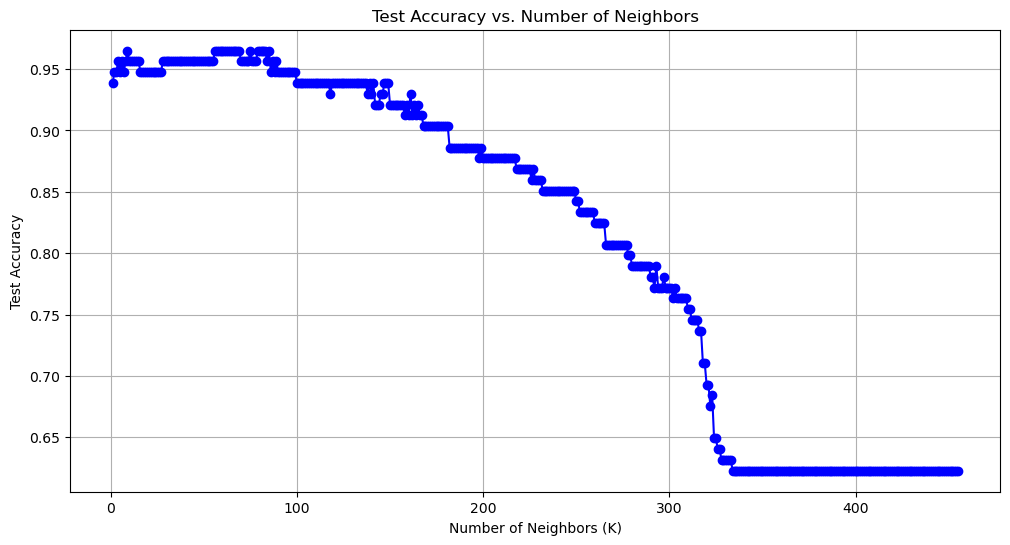

In [162]:
# Check if the lengths are equal before plotting
if len(num_neighbors) == len(test_accuracies):
    # Plotting test accuracy vs. number of neighbors
    plt.figure(figsize=(12, 6))
    plt.plot(num_neighbors, test_accuracies, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Test Accuracy')
    plt.title('Test Accuracy vs. Number of Neighbors')
    plt.grid(True)
    plt.show()
else:
    print("The lengths of filtered_num_neighbors and filtered_test_accuracies do not match.")

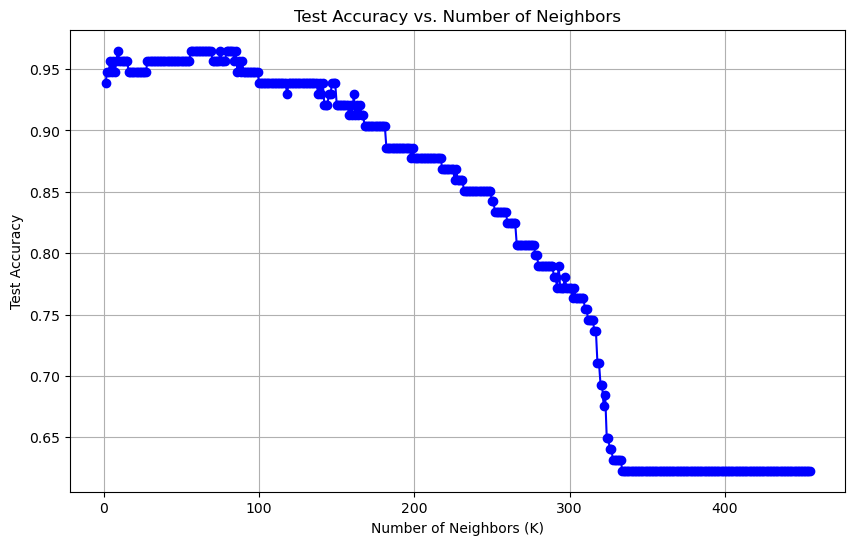

In [163]:
plt.figure(figsize=(10, 6))
plt.plot(num_neighbors, test_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [174]:
from sklearn.model_selection import cross_val_score, train_test_split

In [182]:
n_train_samples = X_train_scaled.shape[0]
k_values = list(range(1, min(n_train_samples, 21)))  # Test K from 1 up to a maximum (e.g., 20)
mean_accuracies = []


In [184]:
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    mean_accuracies.append(mean_accuracy)
    print(f"K={k}, Mean Cross-Validated Accuracy={mean_accuracy:.4f}")

K=1, Mean Cross-Validated Accuracy=0.9407
K=2, Mean Cross-Validated Accuracy=0.9473
K=3, Mean Cross-Validated Accuracy=0.9604
K=4, Mean Cross-Validated Accuracy=0.9582
K=5, Mean Cross-Validated Accuracy=0.9604
K=6, Mean Cross-Validated Accuracy=0.9560
K=7, Mean Cross-Validated Accuracy=0.9604
K=8, Mean Cross-Validated Accuracy=0.9538
K=9, Mean Cross-Validated Accuracy=0.9538
K=10, Mean Cross-Validated Accuracy=0.9538
K=11, Mean Cross-Validated Accuracy=0.9516
K=12, Mean Cross-Validated Accuracy=0.9538
K=13, Mean Cross-Validated Accuracy=0.9582
K=14, Mean Cross-Validated Accuracy=0.9538
K=15, Mean Cross-Validated Accuracy=0.9538
K=16, Mean Cross-Validated Accuracy=0.9538
K=17, Mean Cross-Validated Accuracy=0.9560
K=18, Mean Cross-Validated Accuracy=0.9538
K=19, Mean Cross-Validated Accuracy=0.9538
K=20, Mean Cross-Validated Accuracy=0.9538


In [186]:
print(f"K={k} (Number of Training Samples), Mean Cross-Validated Accuracy={mean_accuracy:.4f}")


K=20 (Number of Training Samples), Mean Cross-Validated Accuracy=0.9538


### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [192]:
# ANSWER
# Standarize X
k_values = range(1, min(n_train_samples, 21))
mean_accuracies_standardized = []
mean_accuracies_unstandardized = []

In [193]:
for k in k_values:
    model_standardized = KNeighborsClassifier(n_neighbors=k)
    scores_standardized = cross_val_score(model_standardized, X_train_scaled, y_train, cv=5, scoring='accuracy')
    mean_accuracy_standardized = scores_standardized.mean()
    mean_accuracies_standardized.append(mean_accuracy_standardized)
    
    model_unstandardized = KNeighborsClassifier(n_neighbors=k)
    scores_unstandardized = cross_val_score(model_unstandardized, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy_unstandardized = scores_unstandardized.mean()
    mean_accuracies_unstandardized.append(mean_accuracy_unstandardized)

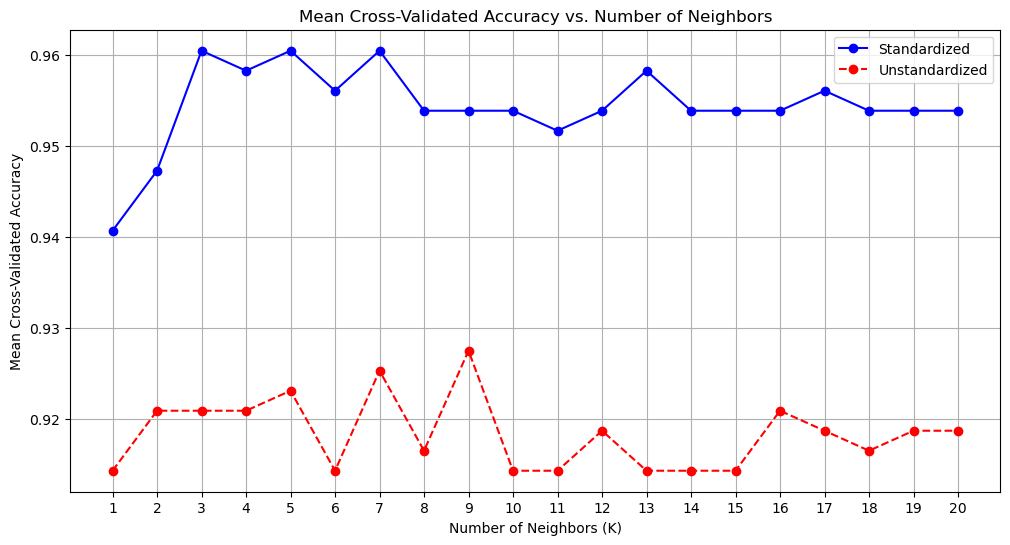

In [194]:
# ANSWER
# plot test accuracy by number of neighbors:
plt.figure(figsize=(12, 6))
plt.plot(k_values, mean_accuracies_standardized, marker='o', linestyle='-', color='b', label='Standardized')
plt.plot(k_values, mean_accuracies_unstandardized, marker='o', linestyle='--', color='r', label='Unstandardized')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Mean Cross-Validated Accuracy vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.xticks(k_values)  # Show all K values on the x-axis
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



